# Fourier Transform 

### Introduction 
In this notebook we will learn about:
1. The basic mathematics of Fourier transform
2. How to use Fourier analysis using a scientific package such as scikitlearn
3. Implementation of simple 1D Fourier transform  

Methods based on Fourier transform are applied in many disciplines, from signal-processing to finances. So what is Fourier transform? Before goinng deeper, imagine if you have some functions, say a polynomial $f_p(x)=ax^3+x+bx^4$, an exponential $e^x$, or a sinusoidal function $\cos(x)$. 

***In class discussion*** (make a group of two/three and discuss the following questions):
1. What make these three class functions similar or different? 
2. Plot (or schematically draw on a piece of paper) simple functions $[x, x^2, x^3, x^4]$,  $f_p(x),\cos(x)$ and $e^x$. Does $f_p(x), \cos(x)$ or  $e^x$ graphically look similar to the set of simple functions  $[x, x^2, x^3, x^4]$?
3. Using Tylor expansion, write $f_p(x),e^x$ and $\cos(x)$ as a series of $x, x^2, x^3, \cdots$. 

So what we have done so far? We wrote (decompose) those three functions in a polynomial form, i.e., using polynomial functions as the basis. You can readily see that it's easy to write any polynamial functions of degree $n$ in terms of $x, x^2$ and so on because these are the natural basis. On the other hand, we need to write an infinite series for a simple periodic function like $\cos x$. In the similar manner, we can write the functions discussed above in terms $\cos (n x)$ and $\sin (n x)$, with $n$ being interger, and this is known as Fourier series:
$$f(x)=a_0/2+\sum^{n=N}_{n=1} A_n \cos \left(\frac{2\pi n x}{T}\right) + B_n \sin \left(\frac{2\pi nx}{T}\right)$$
This cos-sine form is one of many common fomrms of Fourier series and latter we will discuss about Fourier series in exponential form. 
Fourier series is a powerful tool to analyze data as now we can write any arbitray (complicated) function in terms of familiar periodic functions. Moreover, as you shall see, the amplitudes tell us about the nature of the functions. 

### Using Fourier transform to analyze data 
Imagine you're analyzing a time series of signals of experimental observations of a graphene ribbon moving up and down or price movents of a stock in a day. For simplicity let's create an "artficial" data describing the up/down movements. Make sure you execute the cells containing all the functions needed which can be found at the end of the notebook. The height is composed of sin functions and a noise term
$$h(t)=A_1\sin \left(\frac{m_1 *2\pi t}{T}\right)+A_2\sin \left(\frac{m_2 *2\pi t}{T}\right)+A_3\xi(t),$$ 
where $A_1, A_2$ are the amplitudes of sinoduidal functions and $A_3$ is the amplitude of the noise. Next we generate space data points between $t=[0, T]$ with $T=400$ and increament time step of $\Delta T=1$. Note that we will use Fast Fourier Transform (FFT) from scipy package. We will later will implement our own discrete Fourier transfrom. Implementation of FFT is beyond our coursework.  We first start with zero noise ($A_3=0$) and set $A_1=1, m_1=10, A_2=0.2$, and $m_2=70$


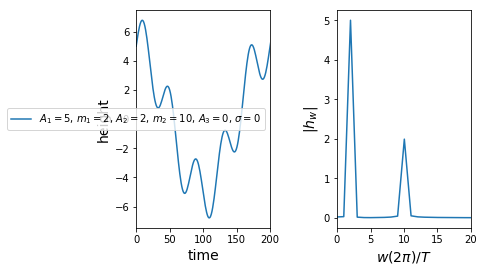

In [22]:
fft_sin_functions_with_noise(A_1=5, m_1=2, A_2=2, m_2=10, A_3=0, sigma=0)

We can see that the absolute amplitude in frequency space peaks at $w=10$ and $w=75$. Note that $w$ is in units of $2\pi/T$. 

Next we add *weak* (Gaussian) noise with $\sigma=0.5$ and use smaller $m_1, m_2$ such that $A_1=1, m_1=5, A_2=0.2, m_2=10, A_3=1.0, \sigma=0.5$

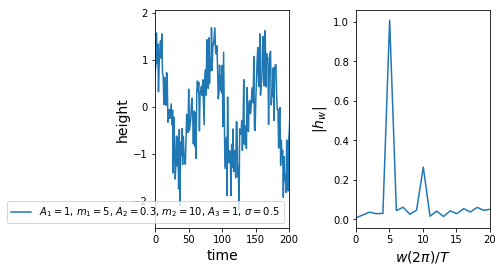

In [25]:
fft_sin_functions_with_noise(A_1=1, m_1=5, A_2=0.3, m_2=10, A_3=1, sigma=0.5)

We can see that the absolute amplitude in frequency space peaks at $w=5$ and $w=10$, as expected.

Finally we test Fourier transform a case where we only have noise and no sin functions. We get roughly a flat spectrum as we Fourier transform a white noise.

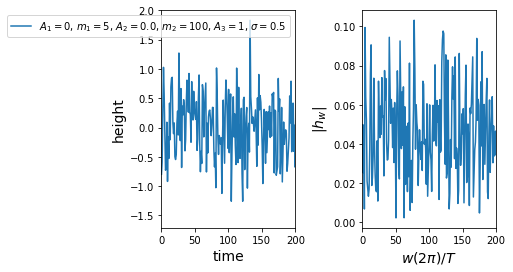

In [24]:
fft_sin_functions_with_noise(A_1=0, m_1=5, A_2=0., m_2=100, A_3=1, sigma=0.5)

# Homework (due in two weeks) 
## Understanding the mathematics of Fourier analysis 
1. What is the Fourier transform of $f(t)=\sin (2\pi \omega t)$ where $\omega$ is real. Check your results using the function we used in class. Write your complete step-by-step derivations to receieve full credits.  
2. Do the same thing for $f(t)=e^{-t^2}$ and $f(t)$ is a Gaussian (white) noise. 

## Using fast fourier transform (fft) from scipy to analyze real data 
1. Analyze the center height movement of buckled ribbon obtained from molecular dynamics simulation.
2. Download one day time series of stock price provided on our course webpage OR you can download your own choice of stock (e.g., NVDA and APPL). Using the same analysis in (1), write what you learn about the stock price movement.
3. Use your own 1D discrete Fourier code to analyze these data and check if results match. 

## Code developements (group project) 
1. We often dealing with high-dimensional data. Write discreete 2D Fourier analysis with $N\times N$ square grids.
2. Perform inverse Fourier transform and compare the inverse (reconstructured) results with the real data. How does choice of $N$ affect the reconsrtcution quality?
3. Now peform the same analysis but with different grids. 


# Codes
## To run the code and call all functions wihtin you need to execute each cells 

In [26]:
#import packages Numpy and scipy 
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [5]:
"""A routine to generate and plot simple sin function with noise"""
fontsize=14
def fft_sin_functions_with_noise(A_1, m_1, A_2, m_2, A_3, sigma):

    fs=14
    # Number of samplepoints
    N = 400 #this is T 
    # sample spacing
    dT = 1.0/N
    x = np.linspace(0.0, int(N*dT), N) #rescaling x from 0 to 1 
    y =  A_1*np.cos(m_1* 2.0*np.pi*x) +A_2*np.sin(m_2 * 2.0*np.pi*x) +A_3*np.random.normal(0, sigma, len(x))
    
    #plt.figure(1)
    plt.subplot(121)
    #plt.subplot(211)

    
    #plt.plot(t, 2*s1)
    
    plt.plot(x*N, y)
    plt.legend([r'$A_1=$'+str(A_1)+r', $m_1=$'+str(m_1)+r', $A_2=$'+str(A_2)+r', $m_2=$'+str(m_2)+r', $A_3=$'+str(A_3)+r', $\sigma=$'+str(sigma)])
    plt.ylabel('height', fontsize=fs)
    plt.xlabel('time', fontsize=fs)
    #plt.ylim([-2, 2])
    plt.xlim([0, 200])

    #plt.show()
    #y = 0.2*np.sin(50.0 * 2.0*np.pi*x) + 1*np.sin(100 * 2.0*np.pi*x)
    #print (x.shape, y.shape)

    #y = np.exp(-x*100)
    yf = scipy.fftpack.fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*dT), int(N/2))
    #plt.plot(t, s1)
    plt.subplot(122)
    #plt.subplot(212)

    #fig, ax = plt.subplots()
    plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
    plt.ylabel(r'$|h_w|$', fontsize=fs)
    plt.xlabel(r'$w (2\pi)/T$', fontsize=fs)
    plt.xlim([0, 2*m_2])
    plt.subplots_adjust(wspace=.5)
    plt.show()
    

## Example 

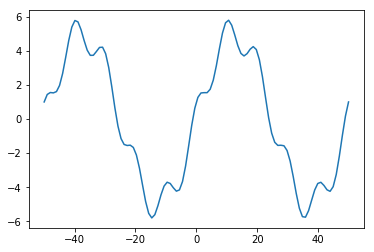

In [30]:
N=100
dT = 1.0/N
sigma=.1
x = (np.linspace(0, int(N*dT), N)-0.5)*N #rescaling x from -N/2 to N/2 
A_1=5
m_1=2
A_2=1
m_2=10
A_3=0

#y =  A_1*(1+np.sin(2.0*np.pi*x/N))/2+A_2*np.cos(m_2 * 2.0*np.pi*x/N) +A_3*np.random.normal(0, sigma, len(x))
y =  A_1*np.sin(m_1*2.0*np.pi*x/N)+A_2*np.cos(m_2 * 2.0*np.pi*x/N) 

plt.plot(x,y)
plt.show()

In [14]:
"""Simple implementation of discrete 1D fourier transform"""
def fourierDiscrete(x, y):
    QTOT=N+1
    fr =  np.zeros(QTOT)
    fi = np.zeros(QTOT)
    f2 = np.zeros(QTOT)
    qq = np.zeros(QTOT)
    delta_q =2*np.pi/N
    countq=0
    shiftL=N/2.
    #for i in range(0, int(N/2)):
    for i in range(0, QTOT):
        #print(i)
        q = i*delta_q
        qq[countq] = q
        for j in range (len(y)):
            fr[countq]+=y[j]*np.cos(q*(x[j]+shiftL))
            fi[countq]+=y[j]*np.sin(q*(x[j]+shiftL))
        
        #rescale fr and fi by number of sample points 
        #fr=fr
        #fi=fi
        
        f2[countq]=(fr[countq]*fr[countq]+fi[countq]*fi[countq])
        countq+=1
    #print(countq)      
    return fr/len(y), fi/len(y), f2/(len(y))**2, qq
    

In [13]:
"""Simple implementation of inverse 1D fourier transform"""

def inverseFourier(fr, fi):
    f_in_posSpace= np.zeros(N)
    for i in range (len(fx)):
        for j in range(len(fr)):
            #fx[i] += fr[j]*np.cos(qq[j]*x[i])/N #+ fi[i]*np.cos(qq[i]*x[i])
            #since we only use 1/2 q-space (symmetry) we need to multiply by 2! 
            f_in_posSpace[i] += fr[j]*np.cos(qq[j]*x[i])+fi[j]*np.sin(qq[j]*x[i])
    return f_in_posSpace

In [15]:
fr, fi, f2, qq = fourierDiscrete(x, y)

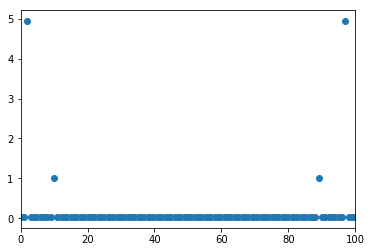

In [16]:
#since we only use 1/2 q-space in this plot we multiply abs|fq| by 2 due to symmtey ! 
plt.scatter(qq/2/np.pi*100, 2*np.sqrt(f2)) 
plt.xlim([0, 100])
plt.show()

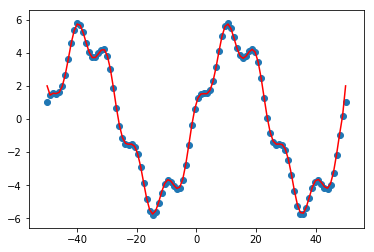

In [556]:
f_in_posSpace = inverseFourier(fr, fi)
plt.plot(x, f_in_posSpace, color='r')
plt.scatter(x, y)
plt.show()

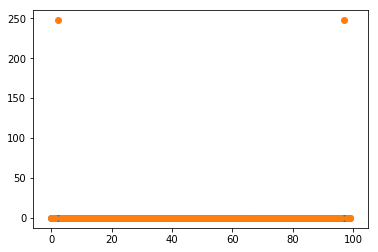

In [382]:
plt.scatter(qq/2/np.pi*100, fr)
plt.scatter(qq/2/np.pi*100, fi)

plt.show()

In [27]:
fr*np.cos(qq*x)

ValueError: operands could not be broadcast together with shapes (101,) (100,) 

In [28]:
np.sum(fr), np.sum(fi)

(2.0000000000000013, -1.3233891402459685e-14)

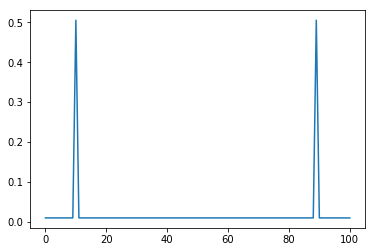

In [29]:
plt.plot(fr)
plt.show()

In [ ]:
#https://github.com/markjay4k/fourier-transform/blob/master/fourier%20transform.ipynb